# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1125)>


In [6]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")

In [8]:
# Create a newsapi client
from newsapi import NewsApiClient

In [9]:
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin",language="en",sort_by="relevancy")

In [11]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum",language="en",sort_by="relevancy")

In [12]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []
for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except:
        pass #means skip to next article
    
    
btc = pd.DataFrame(sentiments)
btc.head()

    

text  Compound  Positive  \
0  Now, even though there are a number of women-f...    0.0772     0.036   
1  A Bitcoin mining site powered by otherwise los...   -0.0516     0.056   
2  Wikipedia editors have voted in favor of dropp...    0.4019     0.088   
3  Warren Buffett has always been a bitcoin skept...   -0.3269     0.085   
4  Image source, Getty Images\r\nThe value of Bit...    0.3400     0.072   

   Negative  Neutral  
0     0.000    0.964  
1     0.061    0.882  
2     0.000    0.912  
3     0.143    0.772  
4     0.000    0.928

In [13]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      20 non-null     object 
 1   Compound  20 non-null     float64
 2   Positive  20 non-null     float64
 3   Negative  20 non-null     float64
 4   Neutral   20 non-null     float64
dtypes: float64(4), object(1)
memory usage: 928.0+ bytes


In [14]:
btc.describe()

Compound   Positive   Negative    Neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.024585   0.070000   0.060600   0.869400
std     0.407708   0.067763   0.061405   0.093083
min    -0.549900   0.000000   0.000000   0.557000
25%    -0.335475   0.000000   0.000000   0.844250
50%     0.012800   0.064000   0.063000   0.894000
75%     0.355075   0.085750   0.077000   0.924250
max     0.750600   0.202000   0.241000   0.964000

In [15]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []
for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except:
        pass #means skip to next article
    
    
eth = pd.DataFrame(sentiments)
eth.head()

text  Compound  Positive  \
0  The US Department of Treasury says Lazarus is ...   -0.7845     0.088   
1  Meta has revealed more of how NFTs will work o...    0.6486     0.135   
2  Opera launched its dedicated "Crypto Browser" ...    0.7351     0.188   
3  A multi-billion dollar cryptocurrency company ...   -0.2263     0.046   
4  When Bored Ape Yacht Club creators Yuga Labs a...   -0.2732     0.000   

   Negative  Neutral  
0     0.231    0.681  
1     0.000    0.865  
2     0.000    0.812  
3     0.075    0.879  
4     0.055    0.945

In [16]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      20 non-null     object 
 1   Compound  20 non-null     float64
 2   Positive  20 non-null     float64
 3   Negative  20 non-null     float64
 4   Neutral   20 non-null     float64
dtypes: float64(4), object(1)
memory usage: 928.0+ bytes


In [17]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc.head()

text  Compound  Positive  \
0  Now, even though there are a number of women-f...    0.0772     0.036   
1  A Bitcoin mining site powered by otherwise los...   -0.0516     0.056   
2  Wikipedia editors have voted in favor of dropp...    0.4019     0.088   
3  Warren Buffett has always been a bitcoin skept...   -0.3269     0.085   
4  Image source, Getty Images\r\nThe value of Bit...    0.3400     0.072   

   Negative  Neutral  
0     0.000    0.964  
1     0.061    0.882  
2     0.000    0.912  
3     0.143    0.772  
4     0.000    0.928

In [18]:
btc.describe()

Compound   Positive   Negative    Neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.024585   0.070000   0.060600   0.869400
std     0.407708   0.067763   0.061405   0.093083
min    -0.549900   0.000000   0.000000   0.557000
25%    -0.335475   0.000000   0.000000   0.844250
50%     0.012800   0.064000   0.063000   0.894000
75%     0.355075   0.085750   0.077000   0.924250
max     0.750600   0.202000   0.241000   0.964000

In [19]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth.describe()

Compound   Positive   Negative    Neutral
count  20.000000  20.000000  20.000000  20.000000
mean   -0.111220   0.052300   0.071500   0.876250
std     0.483153   0.064437   0.071606   0.072168
min    -0.784500   0.000000   0.000000   0.681000
25%    -0.381800   0.000000   0.000000   0.827250
50%    -0.273200   0.023000   0.063000   0.899500
75%     0.303775   0.080500   0.081250   0.935500
max     0.735100   0.188000   0.233000   0.964000

### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has slightly higher positive mean score

Q: Which coin had the highest compound score?

A: Bitcoin has slightly higher compound score

Q. Which coin had the highest positive score?

A: Bitcoin has slightly higher positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [21]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [22]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [23]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

text  Compound  Positive  \
0  Now, even though there are a number of women-f...    0.0772     0.036   
1  A Bitcoin mining site powered by otherwise los...   -0.0516     0.056   
2  Wikipedia editors have voted in favor of dropp...    0.4019     0.088   
3  Warren Buffett has always been a bitcoin skept...   -0.3269     0.085   
4  Image source, Getty Images\r\nThe value of Bit...    0.3400     0.072   

   Negative  Neutral                                             tokens  
0     0.000    0.964  [even, though, number, women-focused, crypto, ...  
1     0.061    0.882  [Bitcoin, mining, site, powered, otherwise, lo...  
2     0.000    0.912  [Wikipedia, editor, voted, favor, dropping, cr...  
3     0.143    0.772  [Warren, Buffett, always, bitcoin, skeptic, bi...  
4     0.000    0.928  [Image, source, Getty, Images, value, Bitcoin,...

In [24]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

text  Compound  Positive  \
0  The US Department of Treasury says Lazarus is ...   -0.7845     0.088   
1  Meta has revealed more of how NFTs will work o...    0.6486     0.135   
2  Opera launched its dedicated "Crypto Browser" ...    0.7351     0.188   
3  A multi-billion dollar cryptocurrency company ...   -0.2263     0.046   
4  When Bored Ape Yacht Club creators Yuga Labs a...   -0.2732     0.000   

   Negative  Neutral                                             tokens  
0     0.231    0.681  [US, Department, Treasury, say, Lazarus, behin...  
1     0.000    0.865  [Meta, revealed, NFTs, work, Instagram, US-bas...  
2     0.000    0.812  [Opera, launched, dedicated, Crypto, Browser, ...  
3     0.075    0.879  [multi-billion, dollar, cryptocurrency, compan...  
4     0.055    0.945  [Bored, Ape, Yacht, Club, creator, Yuga, Labs,...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
from collections import Counter
from nltk import ngrams

In [26]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 5),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('char', 'May'), 3),
 (('Getty', 'Images'), 2),
 (('interest', 'rate'), 2),
 (('Bitcoin', 'dropped'), 2),
 (('year', 'low'), 2),
 (('dramatic', 'drop'), 2),
 (('bitcoin', 'legal'), 2),
 (('legal', 'tender'), 2),
 (('El', 'Salvador'), 2),
 (('credit', 'card'), 2),
 (('even', 'though'), 1),
 (('though', 'number'), 1),
 (('number', 'women-focused'), 1)]

In [27]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 4),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('char', 'May'), 3),
 (('Yuga', 'Labs'), 2),
 (('Yacht', 'Club'), 2),
 (('char', 'April'), 2),
 (('April', '26'), 2),
 (('26', 'Reuters'), 2),
 (('Bitcoin', 'dropped'), 2),
 (('year', 'low'), 2),
 (('US', 'Department'), 1),
 (('Department', 'Treasury'), 1),
 (('Treasury', 'say'), 1),
 (('say', 'Lazarus'), 1),
 (('Lazarus', 'behind'), 1)]

In [28]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Bitcoin', 12),
 ('cryptocurrency', 11),
 ('world', 6),
 ('week', 5),
 ('Reuters', 5),
 ('online', 4),
 ('bitcoin', 4),
 ('investor', 4),
 ('dropped', 4)]

In [30]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 10),
 ('cryptocurrency', 8),
 ('Ethereum', 6),
 ('world', 6),
 ('biggest', 5),
 ('Reuters', 5),
 ('April', 4),
 ('year', 4),
 ('previous', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [32]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

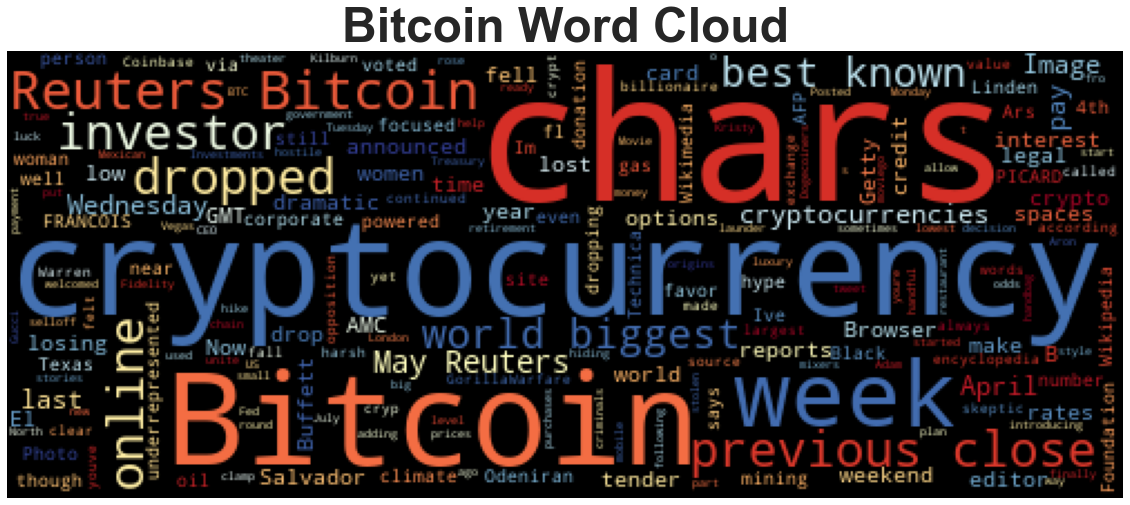

In [33]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

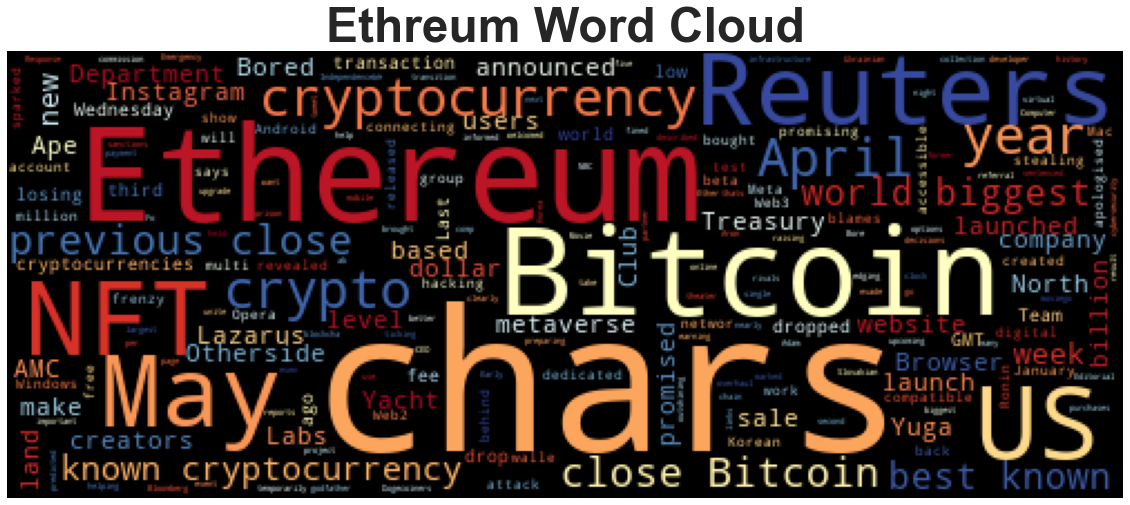

In [34]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth.text.str.cat(), title="Ethreum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [35]:
import spacy
from spacy import displacy

In [36]:
# Download the language model for SpaCy
# !python3 -m spacy download en_core_web_sm

In [37]:


# !python3 -m spacy download en_core_web_lg
# !python3 -m spacy download en_core_web_sm

In [38]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [39]:
import spacy

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [41]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc.text.str.cat()
all_btc_text

'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]Wikipedia editors have voted in favor of dropping cryptocurrency from the Wikimedia Foundation\'s donation options. As Ars Technica reports, an editor for the online encyclopedia called GorillaWarfare… [+1577 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to

In [42]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

doc = nlp(all_btc_text)

doc.user_data["title"] = "Bitcoin NER"

In [43]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [44]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

Odeniran PERSON
Bitcoin GPE
Linden GPE
Texas GPE
April 4th, 2022 DATE
FRANCOIS PICARD/AFP ORG
Getty Images

 

  PERSON
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Buffett PERSON
the weekend DATE
Buffett PERSON
Getty Images PERSON
Bitcoin GPE
the weekend DATE
34,000 MONEY
27,630 MONEY
Vegas GPE
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
Reuters ORG
Bitcoin GPE
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin GPE
16% PERCENT
year DATE
Reuters ORG
Bitcoin GPE
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
Bitcoin GPE
20.9% PERCENT
year DATE
Bitcoin GPE
Gucci PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
Bitcoin GPE
7.23% PERCENT
28,758.29 MONEY
22:05 GMT TIME
Wednesday DATE
2,241.68 MONEY
Bitcoin GPE
40.4% PERCENT
9 CARDINAL
Reuters ORG
Bitcoin GPE
7.81% PERCENT
31,333.41 MONEY
20:03 TIME
Monday DATE
2,655.98 MONEY
Bitcoin GPE
35% PERCEN

---

### Ethereum NER

In [45]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = eth.text.str.cat()
all_eth_text

'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]Opera launched its dedicated "Crypto Browser" into beta back in January, promising to make Web3 as accessible as any Web2 website. The company released the browser for Windows, Mac and Android users … [+1563 chars]A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars]When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to 

In [46]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [47]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent', jupyter=True)

In [48]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

The US Department of Treasury ORG
Lazarus PERSON
The US Treasury Department ORG
North Korean NORP
Lazarus PERSON
$625 million MONEY
Ronin ORG
US GPE
Crypto Browser PERSON
January DATE
Web3 LOC
Web2 ORG
Windows GPE
Mac PERSON
Android PERSON
chars]A multi ORG
Yuga Labs PERSON
Bored Ape Yacht Club ORG
Yuga Labs ORG
Otherside NFT PRODUCT
April 30 DATE
NFT ORG
Bore PERSON
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
chars]April 26 DATE
Reuters ORG
No.2 CARDINAL
second ORDINAL
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
the "Bored Apes Yacht Club ORG
Last night TIME
Bloomberg PERSON
this week DATE
the Ukrainian Computer Emergency Response Team ORG
ESET ORG
Russia GPE
chars]40 days ago DATE
Bitcoin GPE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Bitcoin GPE
Nvidia ORG
Ampere Lite Hash Rate ORG
a year and a half ago DATE
Dan Robinson PERSON
Georgios Konstantopoulos' PERSON
a Dark Forest ORG
August 20 DATE
Reuters ORG
Bitcoin GPE
5.1% PE

---